### Simple Task Management Model - Agent Based 

Similar to previous examples we will build a model for simulating task management. 

2 Agents: 
1. Staff Member
    - Busy or Not Busy 
    - Capability of Work per Time Period (Productivity) 
    - ID of Task Currently Being Worked on 
2. Task 
    - Open, In Progress, or Closed
    - Work Required

In [369]:
from mesa import Agent, Model 
from mesa.time import RandomActivation

### Building Our Staff Member Agent 

In [370]:
class StaffMember(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.state = "available"
        self.productivity = 1
        self.task_id = None
    
    def step(self):
        print('Staff Member ' + str(self.unique_id) + ' reporting for duty!')

### Building Our Task Agent 

In [371]:
class Task(Agent):
    def __init__(self, unique_id, model, work_req):
        super().__init__(unique_id, model)
        self.state = "open"
        self.work_req = work_req
    
    def step(self):
        print('Task ' + str(self.unique_id) + ' has a status of ' + str(self.state))

### Building Our Model 
Note: Assigning work required to be 5 for each task. Need to define units, and then this would potentially vary per staff member as well. 

In [372]:
class TaskModel(Model): 
    def __init__(self, S, T):
        self.num_staff = S
        self.num_tasks = T
        self.schedule_sm = RandomActivation(self)
        self.schedule_task = RandomActivation(self)
        for i in range(self.num_staff): 
            s = StaffMember(i, self)
            self.schedule_sm.add(s)
        
        for j in range(self.num_tasks): 
            t = Task(j, self, 5)
            self.schedule_task.add(t)
    
    def step(self): 
        self.schedule_sm.step()
        self.schedule_task.step()
        

### Testing This Model

In [373]:
model = TaskModel(10, 10)

In [374]:
model.step()

Staff Member 2 reporting for duty!
Staff Member 5 reporting for duty!
Staff Member 8 reporting for duty!
Staff Member 6 reporting for duty!
Staff Member 4 reporting for duty!
Staff Member 3 reporting for duty!
Staff Member 7 reporting for duty!
Staff Member 0 reporting for duty!
Staff Member 1 reporting for duty!
Staff Member 9 reporting for duty!
Task 1 has a status of open
Task 8 has a status of open
Task 6 has a status of open
Task 0 has a status of open
Task 4 has a status of open
Task 9 has a status of open
Task 7 has a status of open
Task 5 has a status of open
Task 2 has a status of open
Task 3 has a status of open


### Now We Need to Add Functionality To Our Agents

For instance. If a staff member is available, we need to assign that staff member to a task. Which will change the agents state to "busy". Then we will update the task and set it to "in progress" which the staff member was just assigned. If a staff member is busy, we will reduce the work required on the task the staff member is working on because they have been working on it for the previous time step! Once the work required is equal to zero for a task - it will then be marked "closed". 


In [375]:
class StaffMember(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.state = "available"
        self.productivity = 1
        self.task = None
    
    def step(self):
        #if the staff member is avail - assign a task 
        if self.state == "available":
            tasks = self.model.schedule_task.agents
            if (len(tasks) > 0):
                #finding first open task and assigning it to this staff member
                for task in tasks:
                    if task.state == "open":
                        self.task = task
                        task.state = "in_progress"
                        self.state = "busy"
                        return
            else: 
                print("There are no open tasks")
                return 
         
        #if staff member is busy, account for the work being done by the staff member
        elif self.state == "busy":
            time_step = 1
            work_done = self.productivity * time_step 
            self.task.work_req -= work_done
            #check if the required work has been reduced to 0 for the assigned task 
            if self.task.work_req == 0: 
                self.task.state = "closed"
                self.state = "available"
                self.task = None
                

### Testing our Model and New Staff Agent - In 5 Steps The Members Should become available and assigned new tasks. This is because we are saying work required = 5 units. And each staff member can complete 1 unit of work per time step. 

In [376]:
model2 = TaskModel(5, 10)

In [377]:
model2.step()

Task 6 has a status of open
Task 7 has a status of open
Task 8 has a status of open
Task 9 has a status of open
Task 1 has a status of in_progress
Task 5 has a status of open
Task 0 has a status of in_progress
Task 2 has a status of in_progress
Task 4 has a status of in_progress
Task 3 has a status of in_progress


In [378]:
model2.step()

Task 2 has a status of in_progress
Task 5 has a status of open
Task 4 has a status of in_progress
Task 8 has a status of open
Task 6 has a status of open
Task 7 has a status of open
Task 3 has a status of in_progress
Task 0 has a status of in_progress
Task 9 has a status of open
Task 1 has a status of in_progress


In [379]:
model2.step()

Task 6 has a status of open
Task 3 has a status of in_progress
Task 2 has a status of in_progress
Task 5 has a status of open
Task 0 has a status of in_progress
Task 4 has a status of in_progress
Task 9 has a status of open
Task 7 has a status of open
Task 8 has a status of open
Task 1 has a status of in_progress


In [380]:
model2.step()

Task 6 has a status of open
Task 1 has a status of in_progress
Task 2 has a status of in_progress
Task 4 has a status of in_progress
Task 3 has a status of in_progress
Task 5 has a status of open
Task 7 has a status of open
Task 0 has a status of in_progress
Task 9 has a status of open
Task 8 has a status of open


In [381]:
model2.step()

Task 8 has a status of open
Task 3 has a status of in_progress
Task 6 has a status of open
Task 9 has a status of open
Task 2 has a status of in_progress
Task 5 has a status of open
Task 1 has a status of in_progress
Task 7 has a status of open
Task 4 has a status of in_progress
Task 0 has a status of in_progress


In [382]:
model2.step()

Task 4 has a status of closed
Task 2 has a status of closed
Task 3 has a status of closed
Task 9 has a status of open
Task 8 has a status of open
Task 6 has a status of open
Task 1 has a status of closed
Task 7 has a status of open
Task 5 has a status of open
Task 0 has a status of closed


In [383]:
model2.step()

Task 6 has a status of in_progress
Task 3 has a status of closed
Task 1 has a status of closed
Task 5 has a status of in_progress
Task 9 has a status of in_progress
Task 2 has a status of closed
Task 7 has a status of in_progress
Task 0 has a status of closed
Task 4 has a status of closed
Task 8 has a status of in_progress


In [384]:
model2.step()

Task 5 has a status of in_progress
Task 9 has a status of in_progress
Task 7 has a status of in_progress
Task 2 has a status of closed
Task 8 has a status of in_progress
Task 1 has a status of closed
Task 4 has a status of closed
Task 0 has a status of closed
Task 3 has a status of closed
Task 6 has a status of in_progress


In [385]:
model2.step()

Task 1 has a status of closed
Task 4 has a status of closed
Task 3 has a status of closed
Task 6 has a status of in_progress
Task 2 has a status of closed
Task 9 has a status of in_progress
Task 0 has a status of closed
Task 7 has a status of in_progress
Task 5 has a status of in_progress
Task 8 has a status of in_progress


In [386]:
model2.step()

Task 6 has a status of in_progress
Task 4 has a status of closed
Task 9 has a status of in_progress
Task 8 has a status of in_progress
Task 0 has a status of closed
Task 3 has a status of closed
Task 7 has a status of in_progress
Task 5 has a status of in_progress
Task 2 has a status of closed
Task 1 has a status of closed


In [387]:
model2.step()

Task 5 has a status of in_progress
Task 7 has a status of in_progress
Task 6 has a status of in_progress
Task 4 has a status of closed
Task 9 has a status of in_progress
Task 8 has a status of in_progress
Task 3 has a status of closed
Task 1 has a status of closed
Task 2 has a status of closed
Task 0 has a status of closed


In [388]:
model2.step()

Task 8 has a status of closed
Task 3 has a status of closed
Task 0 has a status of closed
Task 5 has a status of closed
Task 2 has a status of closed
Task 4 has a status of closed
Task 6 has a status of closed
Task 7 has a status of closed
Task 9 has a status of closed
Task 1 has a status of closed


In [389]:
model2.step()

Task 3 has a status of closed
Task 2 has a status of closed
Task 6 has a status of closed
Task 1 has a status of closed
Task 7 has a status of closed
Task 8 has a status of closed
Task 4 has a status of closed
Task 0 has a status of closed
Task 9 has a status of closed
Task 5 has a status of closed


### Woohoo! We have a working model for task management! 

### Some Things To Do: 
1. Producitivity Should Be Individualized - update per instance?
2. Make it more human. WE are not agents, but humans. Not just resources, but beings. 
3. Conceptualize the units we are using a little better. 
4. Graph scenarios. 
5. As a side note... Might be able to build this without a python package. 

### Adapting it to our Real Human World

So we have a team of people. Each is a staff member. Each member has a rate at which they can complete the work in front of them. For example, each week Joe might be able to accomplish 10 tasks while Elizabeth can accomplish 20. If we broke this down to days: 
   - Joe has a productivity rate of 10 tasks/ 5 days = 2 tasks/day
   - Elizabeth has a productivity rate of 20 tasks / 5 days = 4 tasks/day
    
Without taking into account the varying complexity of each task, lets add some humanity to our staff member. For instance a name field, and then individualized productivity numbers. 

In [609]:
class StaffMember(Agent):
    def __init__(self, unique_id, model, name, productivity):
        super().__init__(unique_id, model)
        self.name = name
        self.state = "available"
        self.productivity = productivity
        self.task = None
        self.num_tasks_completed = 0
    
    def step(self):
        #if the staff member is avail - assign a task 
        if self.state == "available":
            tasks = self.model.schedule_task.agents
            if (len(tasks) > 0):
                #finding first open task and assigning it to this staff member
                for task in tasks:
                    if task.state == "open":
                        self.task = task
                        task.state = "in_progress"
                        self.state = "busy"
                        return
            else: 
                print("There are no open tasks")
                return 
         
        #if staff member is busy, account for the work being done by the staff member
        elif self.state == "busy":
            time_step = 1
            work_done = self.productivity * time_step 
            self.task.work_req -= work_done
            #check if the required work has been reduced to 0 for the assigned task 
            if self.task.work_req <= 0:
                self.num_tasks_completed = self.num_tasks_completed + 1
                self.task.state = "closed"
                self.state = "available"
                self.task = None
                self.model.num_tasks_completed += 1
                

### Designing Our Model to Take in A List of Team Members. (W/ associated names and productivity numbers)

In [610]:
class TaskModel(Model): 
    def __init__(self, staff, T):
        self.staff = staff
        self.num_tasks = T
        self.schedule_sm = RandomActivation(self)
        self.schedule_task = RandomActivation(self)
        
        for i in range(len(staff)): 
            s = StaffMember(i, self, staff[i]['name'], staff[i]['productivity'])
            self.schedule_.add(s)
        
        for j in range(self.num_tasks): 
            t = Task(j, self, 5)
            self.schedule_task.add(t)
    
    def step(self): 
        self.schedule_sm.step()
        self.schedule_task.step()
  

### Now Lets Build Out Team Object (Array of Dicts with each team member)

In [611]:
team = [
    {
        'name': 'Elizabeth', 
        'productivity': 4
    }, 
    {
        'name': 'Joe', 
        'productivity': 2
    }
]

### Building Our Model - With Our Newly Formed Team (note: we have not detailed out tasks or made them complex yet)

In [612]:
model3 = TaskModel(team, 10)

AttributeError: 'TaskModel' object has no attribute 'schedule_'

In [394]:
model3.step()

I am Elizabeth and I am available
I am Joe and I am available
Task 9 has a status of closed
Task 1 has a status of closed
Task 8 has a status of closed
Task 6 has a status of closed
Task 4 has a status of closed
Task 0 has a status of closed
Task 7 has a status of closed
Task 3 has a status of closed
Task 5 has a status of closed
Task 2 has a status of closed


### So Now, we have assigned Joe and Elizabeth to tasks which both have 5 sub-tasks (or units of work). Joe will take longer to finish his task due to his lower productivity rate. 

In [395]:
model3.step()

I am Joe and I am available
I am Elizabeth and I am available
Task 8 has a status of closed
Task 3 has a status of closed
Task 4 has a status of closed
Task 0 has a status of closed
Task 7 has a status of closed
Task 6 has a status of closed
Task 5 has a status of closed
Task 2 has a status of closed
Task 1 has a status of closed
Task 9 has a status of closed


In [396]:
model3.step()

I am Elizabeth and I am available
I am Joe and I am available
Task 9 has a status of closed
Task 2 has a status of closed
Task 1 has a status of closed
Task 3 has a status of closed
Task 5 has a status of closed
Task 0 has a status of closed
Task 4 has a status of closed
Task 8 has a status of closed
Task 6 has a status of closed
Task 7 has a status of closed


### Elizabeth has finished her task (which required the same amount of work as Joe's). She is now available to start on the next task. 

In [397]:
model3.step()

I am Elizabeth and I am available
I am Joe and I am available
Task 8 has a status of closed
Task 7 has a status of closed
Task 3 has a status of closed
Task 6 has a status of closed
Task 0 has a status of closed
Task 1 has a status of closed
Task 4 has a status of closed
Task 9 has a status of closed
Task 5 has a status of closed
Task 2 has a status of closed


### Next Steps. 
1. Visualize this by adding the data collector feature via Mesa
2. Detail out the logic on accepting tasks - for instance, if a task is senior level - only have senior level staff members accept it. 

### Adding the Data Collector to Collect Staff Member Data

In [634]:
from mesa.datacollection import DataCollector 

#### What Do We Want to Visualize?
1. Number of Tasks "Closed" over time per individual on the team
2. Duration and Tasks Assigned to each Individual? Almost like a Gantt of what happened and when - Stacked bars probably 

In [635]:
class TaskModel(Model): 
    def __init__(self, staff, T):
        self.staff = staff
        self.num_tasks = T
        self.num_tasks_completed = 0
        self.schedule = RandomActivation(self)
        self.schedule_task = RandomActivation(self)
       
        for i in range(len(staff)): 
            s = StaffMember(i, self, staff[i]['name'], staff[i]['productivity'])
            self.schedule.add(s)
        
        for j in range(self.num_tasks): 
            t = Task(j, self, 5)
            self.schedule_task.add(t)
        
        self.dc = DataCollector(
            model_reporters={"Total Tasks Completed": "num_tasks_completed"}, 
            agent_reporters={"Individual Tasks Completed": "num_tasks_completed"}
        )
        
    def step(self): 
        self.schedule.step()
        self.schedule_task.step()
        self.dc.collect(self)
        

In [636]:
model4 = TaskModel(team, 100)

In [637]:
for t in range(100): 
    model4.step()

Task 99 has a status of open
Task 49 has a status of open
Task 13 has a status of open
Task 25 has a status of open
Task 42 has a status of open
Task 74 has a status of open
Task 93 has a status of open
Task 37 has a status of open
Task 68 has a status of open
Task 81 has a status of open
Task 30 has a status of open
Task 16 has a status of open
Task 32 has a status of open
Task 5 has a status of open
Task 26 has a status of open
Task 7 has a status of open
Task 65 has a status of open
Task 27 has a status of open
Task 29 has a status of open
Task 38 has a status of open
Task 2 has a status of open
Task 57 has a status of open
Task 64 has a status of open
Task 6 has a status of open
Task 71 has a status of open
Task 73 has a status of open
Task 4 has a status of open
Task 19 has a status of open
Task 40 has a status of open
Task 75 has a status of open
Task 23 has a status of open
Task 86 has a status of open
Task 48 has a status of open
Task 17 has a status of open
Task 41 has a statu

Task 28 has a status of open
Task 86 has a status of open
Task 85 has a status of open
Task 83 has a status of open
Task 3 has a status of closed
Task 81 has a status of open
Task 79 has a status of open
Task 51 has a status of open
Task 48 has a status of open
Task 18 has a status of closed
Task 96 has a status of open
Task 26 has a status of open
Task 16 has a status of closed
Task 19 has a status of closed
Task 50 has a status of open
Task 33 has a status of open
Task 25 has a status of open
Task 84 has a status of open
Task 39 has a status of open
Task 81 has a status of open
Task 61 has a status of open
Task 1 has a status of closed
Task 15 has a status of closed
Task 34 has a status of open
Task 22 has a status of open
Task 20 has a status of closed
Task 65 has a status of open
Task 29 has a status of open
Task 12 has a status of closed
Task 40 has a status of open
Task 37 has a status of open
Task 73 has a status of open
Task 93 has a status of open
Task 14 has a status of close

Task 58 has a status of open
Task 77 has a status of open
Task 92 has a status of open
Task 90 has a status of open
Task 76 has a status of open
Task 19 has a status of closed
Task 24 has a status of closed
Task 86 has a status of open
Task 54 has a status of open
Task 73 has a status of open
Task 60 has a status of open
Task 18 has a status of closed
Task 21 has a status of closed
Task 13 has a status of closed
Task 44 has a status of open
Task 30 has a status of closed
Task 87 has a status of open
Task 39 has a status of closed
Task 74 has a status of open
Task 17 has a status of closed
Task 2 has a status of closed
Task 70 has a status of open
Task 57 has a status of open
Task 47 has a status of open
Task 4 has a status of closed
Task 79 has a status of open
Task 36 has a status of closed
Task 96 has a status of open
Task 41 has a status of closed
Task 64 has a status of open
Task 68 has a status of open
Task 8 has a status of closed
Task 72 has a status of open
Task 33 has a status

In [638]:
model_df = model4.dc.get_model_vars_dataframe()

In [639]:
model_df.tail()

,Total Tasks Completed
95,56
96,56
97,56
98,57
99,58


<AxesSubplot:>

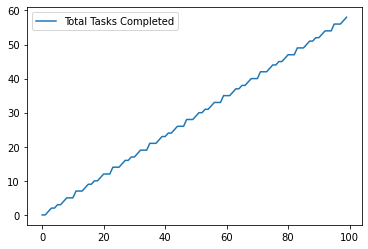

In [640]:
model_df.plot()

In [641]:
agent_df = model4.dc.get_agent_vars_dataframe()

In [642]:
agent_df.info

<bound method DataFrame.info of               Individual Tasks Completed
Step AgentID                            
1    0                                 0
     1                                 0
2    0                                 0
     1                                 0
3    0                                 1
...                                  ...
98   1                                24
99   0                                33
     1                                24
100  0                                33
     1                                25

[200 rows x 1 columns]>

<AxesSubplot:xlabel='Step', ylabel='Tasks Completed by Elizabeth'>

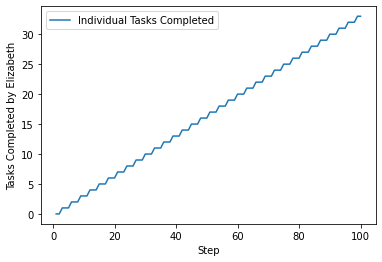

In [643]:
end_completed_tasks = agent_df.xs(0, level="AgentID")
end_completed_tasks.plot(ylabel="Tasks Completed by Elizabeth")

<AxesSubplot:xlabel='Step', ylabel='Tasks Completed by Joe'>

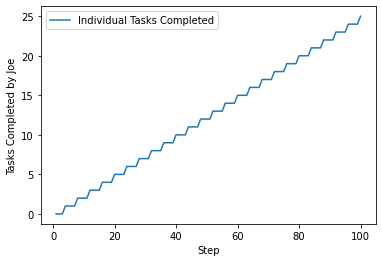

In [644]:
end_completed_tasks = agent_df.xs(1, level="AgentID")
end_completed_tasks.plot.line(ylabel="Tasks Completed by Joe")

### Might Take a Deeper Dive Back Into Pandas DF and Graphing - Ending Stream Here! 